In [1]:
import squigglepy as sq

from datetime import datetime
from pprint import pprint

from libs import plot_exponential_growth
from params import start_task_length, agi_task_length, doubling_time, shift


O3_LAUNCH_DATE = datetime(2025, 4, 16)
CLAUDE_3P7_LAUNCH_DATE = datetime(2025, 2, 24)

print("Loaded libraries")

## START task length (displayed in sec) ##
{1: 1.0,
 5: 1.0,
 10: 1.0,
 20: 1.0,
 30: 1.45,
 40: 3.03,
 50: 5.97,
 60: 11.52,
 70: 23.4,
 80: 53.07,
 90: 166.45,
 95: 433.88,
 99: 2424.69}



## AGI task length (displayed in hrs) ##
{1: 40,
 5: 51,
 10: 80,
 20: 138,
 30: 206,
 40: 290,
 50: 398,
 60: 548,
 70: 772,
 80: 1151,
 90: 2016,
 95: 3153,
 99: 7188}



## DOUBLING TIME (displayed in days) ##
{1: 94,
 5: 118,
 10: 118,
 20: 118,
 30: 134,
 40: 160,
 50: 186,
 60: 212,
 70: 212,
 80: 212,
 90: 221,
 95: 251,
 99: 315}



## SHIFT (displayed in days) ##
{1: 0,
 5: 31,
 10: 57,
 20: 89,
 30: 112,
 40: 131,
 50: 150,
 60: 169,
 70: 188,
 80: 211,
 90: 244,
 95: 270,
 99: 319}
Loaded libraries


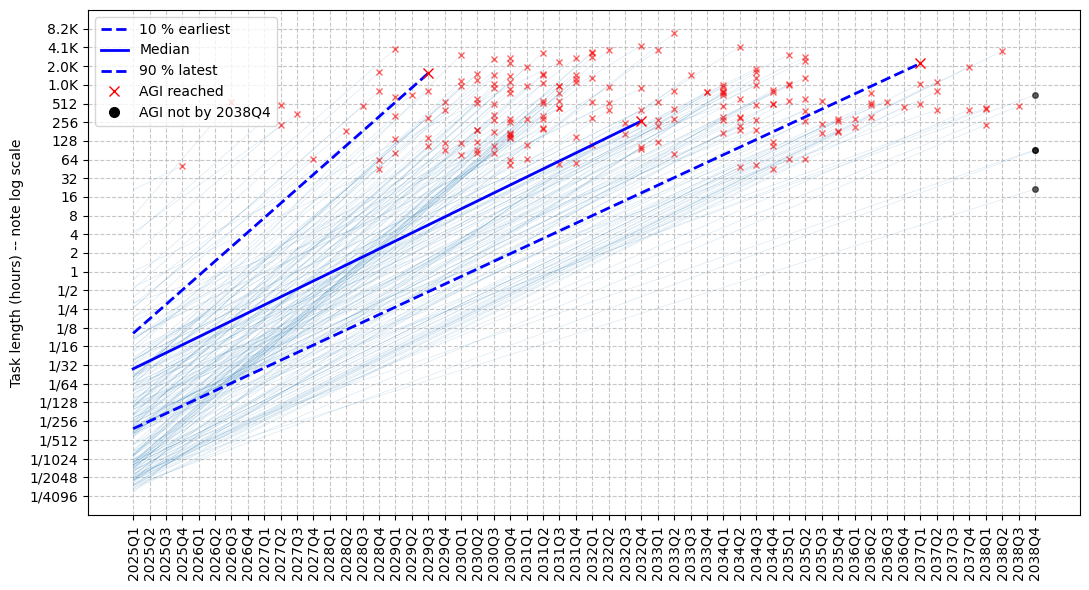

In [2]:
samples = plot_exponential_growth(
    doubling_time_days=doubling_time,
    starting_hours=start_task_length,
    agi_task_length=agi_task_length,
    shift=shift,
    n_quarters=55,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)

In [3]:
# -----------
# ACCELERATION: Is the curve actually superexponential or subexponential? Does the doubling time itself change? Set the curve parameter.

print("\n\n")
print("## ACCELERATION")
acceleration = sq.mixture(
    [
        [0.1, 1 + sq.lognorm(0.005, 0.1, credibility=80)],
        [0.8, 1],
        [0.1, 1 - sq.lognorm(0.005, 0.1, credibility=80)],
    ]
)
pprint(sq.get_percentiles(acceleration @ 100_000, digits=3))




## ACCELERATION
{1: 0.896,
 5: 0.978,
 10: 1.0,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.0,
 95: 1.022,
 99: 1.096}
